# 第三次作业 

郭英明 2183211376

## homework_01

从Scikit-learn库中导入新闻文本数据集(fetch_20newsgroups)，利用奇异值分解方法实现潜在语义分析，然后利用聚类算法实现文本聚类。

### 导入数据及库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords

In [2]:
all_data = fetch_20newsgroups(subset='all')

In [3]:
print(all_data.target_names)
print(len(all_data.data))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
18846


### 数据预处理

In [4]:
#删除所有标点符号、数字和特殊字符
data = all_data.data
news_df = pd.DataFrame({'document':data})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

In [5]:
#删除较短的单词
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [6]:
#将文本变成小写，使得大小写失效
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [7]:
#删除停止词
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
detokenized_doc = []

for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
news_df['clean_doc'] = detokenized_doc

### 单词-文本矩阵

In [8]:
#使用sklearn的TfidfVectorizer来创建一个包含1000个词项的文档-词项矩阵,单词文本矩阵为其转置。
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',
max_features =1000, # keep top 1000 terms
max_df = 0.5,
smooth_idf = True)
X = vectorizer.fit_transform(news_df['clean_doc'])
X1 = X.T
X1.shape

(1000, 18846)

### 潜在语义分析

In [9]:
from sklearn.decomposition import TruncatedSVD
# SVD用向量表示文本和单词，设置20个话题，得到18846个文本在20个话题向量中的表示，以矩阵形式展现。
lsa = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
#svd_model.fit(X)
#len(svd_model.components_)
#lsa = TruncatedSVD(n_pick_topics)               
X2 = lsa.fit_transform(X)
print(X2)
print(X2.shape)

[[ 0.1676879  -0.05298579  0.23230789 ...  0.04705456  0.02595214
  -0.06600687]
 [ 0.1641049   0.16029535 -0.00539726 ... -0.03862152 -0.0209592
  -0.14987023]
 [ 0.19488108 -0.13001702 -0.04055337 ... -0.02893472 -0.28993071
   0.04045693]
 ...
 [ 0.18983039  0.05513539 -0.1072786  ... -0.16675058  0.02455
  -0.01266018]
 [ 0.16362633  0.02285859  0.02441014 ... -0.00705505  0.03561618
   0.01723291]
 [ 0.18147148 -0.01006673 -0.05132496 ... -0.13206073  0.03439183
   0.00259133]]
(18846, 20)


In [10]:
#打印出20个话题中前10个最重要的单词
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
#     print(len(comp))
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i+1)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 1: 
article
 
university
 
posting
 
like
 
host
 
nntp
 
know
 
people
 
think
 
good
 
Topic 2: 
windows
 
thanks
 
card
 
host
 
file
 
nntp
 
drive
 
posting
 
mail
 
university
 
Topic 3: 
game
 
team
 
nntp
 
host
 
posting
 
games
 
university
 
hockey
 
year
 
baseball
 
Topic 4: 
posting
 
nntp
 
host
 
state
 
ohio
 
distribution
 
cwru
 
cleveland
 
university
 
magnus
 
Topic 5: 
nasa
 
clipper
 
netcom
 
access
 
chip
 
space
 
encryption
 
digex
 
government
 
escrow
 
Topic 6: 
drive
 
scsi
 
drives
 
hard
 
sale
 
card
 
controller
 
disk
 
apple
 
floppy
 
Topic 7: 
nasa
 
space
 
drive
 
scsi
 
shuttle
 
henry
 
orbit
 
research
 
earth
 
moon
 
Topic 8: 
ohio
 
state
 
windows
 
magnus
 
cleveland
 
nasa
 
drive
 
freenet
 
cwru
 
israel
 
Topic 9: 
access
 
digex
 
host
 
nntp
 
posting
 
drive
 
windows
 
cwru
 
cleveland
 
scsi
 
Topic 10: 
israel
 
armenian
 
israeli
 
armenians
 
turkish
 
jews
 
virginia
 
government
 
armenia
 
arab
 
Topic 11: 
access
 

In [11]:
#打印出20个话题中前2个重要的文档
pick_docs = 2  # 每个话题挑出2个最具代表性的文档
topic_docid = [X2[:, t].argsort()[:-(pick_docs + 1):-1] for t in range(20)]
# argsort,返回排序后的序号
for i in range(20):
    print("Topic"+str(i+1)+":")
    print(topic_docid[i])
    print(' ')

Topic1:
[ 8906 12358]
 
Topic2:
[16406   834]
 
Topic3:
[17077  9419]
 
Topic4:
[17182 13602]
 
Topic5:
[17212  2582]
 
Topic6:
[3799 1507]
 
Topic7:
[ 7627 15083]
 
Topic8:
[17318  9790]
 
Topic9:
[8970 7517]
 
Topic10:
[9371 8820]
 
Topic11:
[8970 7517]
 
Topic12:
[ 9283 13838]
 
Topic13:
[11031 18640]
 
Topic14:
[9986 2622]
 
Topic15:
[12663 17909]
 
Topic16:
[ 6929 17965]
 
Topic17:
[ 9704 14844]
 
Topic18:
[14844  9704]
 
Topic19:
[10368 18471]
 
Topic20:
[11607 16848]
 


### 文本聚类

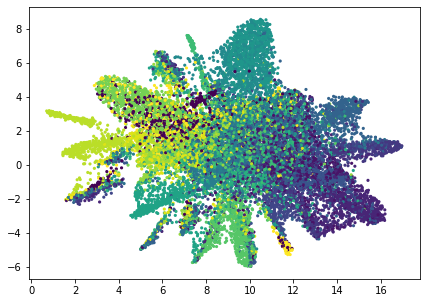

In [13]:
#umap进行文本聚类
import umap
X_topics = lsa.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = all_data.target,
s = 10, # size
edgecolor='none'
            )
plt.show()

## homework_02

从交大新闻网主页新闻栏目(http://news.xjtu.edu.cn/zyxw.htm)下载最新的100条新闻报道，
利用奇异值分解方法实现潜在语义分析，然后利用聚类算法实现文本聚类。

In [15]:
#数据导入
df = pd.read_csv('D:/桌面/新闻.csv')
df

,标题链接,y,r_链接,r,zy2
0,王树国会见招商银行西安分行党委书记、行长钱曦一行\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/130451.htm,20,3月20日下午，校长王树国在创新港会见招商银行西安分行党委书记、行长钱曦一行。校党委副书记赵...
1,西安交通大学党委理论学习中心组开展党史学习教育专题研讨\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/130448.htm,20,3月19日下午，校党委书记卢建军主持西安交通大学党委理论学习中心组党史学习教育专题学习研讨，...
2,【文明巡礼】幼儿园：文化建设引领发展 多元实践立德树人\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/130416.htm,19,"在习近平新时代中国特色社会主义思想引领下，交大幼儿园深入贯彻落实党的十九大精神,以立德树人为..."
3,西安交大物理试验班毕业生以第一作者身份在《科学》发表科研成果\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/130401.htm,19,2018年，一种新的神奇材料“魔角扭转双层石墨烯”被麻省理工大学科研人员实现。这种材料迅速在...
4,陕投集团党委书记、董事长袁小宁一行来校洽谈合作\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/130385.htm,19,3月18日下午，陕投集团党委书记、董事长袁小宁一行到中国西部科技创新港洽谈合作，西安交通大学...
...,...,...,...,...,...
95,【西安日报】陈晨：从学习党史中感悟初心使命\n ...,21-Mar,http://news.xjtu.edu.cn/info/1033/129693.htm,1,习近平总书记指出，历史是最好的教科书。对中国共产党人来说，中国革命历史是最好的营养剂。历史是...
96,齐上阵 总动员 为学子安全返校护航\n,21-Mar,http://news.xjtu.edu.cn/info/1033/129690.htm,1,春到人间草木知，西安交大校园内杨柳依依、梅花浅笑，迎接着2021年春季学期返校的学子们。根据...
97,交大教师热议创新港科创基地项目荣获鲁班奖\n ...,21-Feb,http://news.xjtu.edu.cn/info/1033/129680.htm,28,2月23日，中国建筑业协会发布2020～2021年度第一批中国建设工程鲁班奖（国家优质工程）...
98,严鉴铂率法士特集团、秦川集团高层来校调研\n ...,21-Feb,http://news.xjtu.edu.cn/info/1033/129667.htm,28,2月26日上午，法士特集团党委书记、董事长，秦川集团党委书记、董事长严鉴铂带队来校调研并座谈...


###  数据预处理

In [16]:
#提取对应的100条新闻
docs = df['zy2']
docs

0     3月20日下午，校长王树国在创新港会见招商银行西安分行党委书记、行长钱曦一行。校党委副书记赵...
1     3月19日下午，校党委书记卢建军主持西安交通大学党委理论学习中心组党史学习教育专题学习研讨，...
2     在习近平新时代中国特色社会主义思想引领下，交大幼儿园深入贯彻落实党的十九大精神,以立德树人为...
3     2018年，一种新的神奇材料“魔角扭转双层石墨烯”被麻省理工大学科研人员实现。这种材料迅速在...
4     3月18日下午，陕投集团党委书记、董事长袁小宁一行到中国西部科技创新港洽谈合作，西安交通大学...
                            ...                        
95    习近平总书记指出，历史是最好的教科书。对中国共产党人来说，中国革命历史是最好的营养剂。历史是...
96    春到人间草木知，西安交大校园内杨柳依依、梅花浅笑，迎接着2021年春季学期返校的学子们。根据...
97    2月23日，中国建筑业协会发布2020～2021年度第一批中国建设工程鲁班奖（国家优质工程）...
98    2月26日上午，法士特集团党委书记、董事长，秦川集团党委书记、董事长严鉴铂带队来校调研并座谈...
99    ​2020年11月20日召开的全国精神文明建设表彰大会上，西安交通大学荣获“全国文明校园”荣...
Name: zy2, Length: 100, dtype: object

In [18]:
#分词，采用中文分词库jieba进行分词
import jieba
for i in range(100):
    docs[i] = jieba.lcut(docs[i])
docs

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\gym\AppData\Local\Temp\jieba.cache
Loading model cost 0.820 seconds.
Prefix dict has been built successfully.
<ipython-input-18-4cb8be7b7777>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  docs[i] = jieba.lcut(docs[i])


0     [3, 月, 20, 日, 下午, ，, 校长, 王树国, 在, 创新, 港, 会见, 招商...
1     [3, 月, 19, 日, 下午, ，, 校, 党委书记, 卢, 建军, 主持, 西安交通大...
2     [在, 习近平, 新, 时代, 中国, 特色, 社会主义, 思想, 引领, 下, ，, 交大...
3     [2018, 年, ，, 一种, 新, 的, 神奇, 材料, “, 魔角, 扭转, 双层, ...
4     [3, 月, 18, 日, 下午, ，, 陕投, 集团, 党委书记, 、, 董事长, 袁小宁...
                            ...                        
95    [习近平, 总书记, 指出, ，, 历史, 是, 最好, 的, 教科书, 。, 对, 中国共...
96    [春到, 人间, 草木, 知, ，, 西安交大, 校园内, 杨柳依依, 、, 梅花, 浅笑,...
97    [2, 月, 23, 日, ，, 中国, 建筑业, 协会, 发布, 2020, ～, 202...
98    [2, 月, 26, 日, 上午, ，, 法士特, 集团, 党委书记, 、, 董事长, ，,...
99    [​, 2020, 年, 11, 月, 20, 日, 召开, 的, 全国, 精神文明, 建设...
Name: zy2, Length: 100, dtype: object

In [19]:
#去除停用词
import re
with open('D:/桌面/中文停用词库.txt',encoding='UTF-8') as fp:
    stopwords = fp.read()
swlist = stopwords.splitlines()#将停用词表转换为list
for i in range(len(docs)-1,-1,-1):
    for j in range(len(docs[i])-1,-1,-1):
        if docs[i][j] in swlist:
            del docs[i][j]
for i in range(100):
    docs[i] =" ".join(docs[i])

### 单词-文档矩阵

In [22]:
docs

0     月 20 日 下午 校长 王树国 创新 港 会见 招商银行 西安 分行 党委书记 行长 钱曦...
1     月 19 日 下午 校 党委书记 卢 建军 主持 西安交通大学 党委 理论 学习 中心组 党...
2     习近平 新 时代 中国 特色 思想 引领 交大 幼儿园 贯彻落实 党 十九 精神 立德 树 ...
3     2018 年 一种 新 神奇 材料 魔角 扭转 双层 石墨 烯 麻省理工 大学 科研人员 材...
4     月 18 日 下午 陕投 集团 党委书记 董事长 袁小宁 一行 中国 西部 科技 创新 港 ...
                            ...                        
95    习近平 总书记 指出 历史 教科书 中国共产党 中国 革命 历史 营养 剂 历史 一面镜子 ...
96    春到 人间 草木 知 西安交大 校园内 杨柳依依 梅花 浅笑 迎接 2021 年 春季 学期...
97    月 23 日 中国 建筑业 协会 发布 2020 2021 年度 第一批 中国 建设工程 鲁...
98    月 26 日 上午 法士特 集团 党委书记 董事长 秦川 集团 党委书记 董事长 严鉴 铂 ...
99    ​ 2020 年 11 月 20 日 全国 精神文明 建设 表彰大会 西安交通大学 荣获 全...
Name: zy2, Length: 100, dtype: object

In [23]:
#使用sklearn的TfidfVectorizer来创建一个包含1000个词项的文档-词项矩阵,单词文本矩阵为其转置。
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
max_features =500, # keep top 500 terms
max_df = 0.5,
smooth_idf = True)
X = vectorizer.fit_transform(docs)
X1 = X.T
X1.shape

(500, 100)

### 潜在语义分析

In [26]:
from sklearn.decomposition import TruncatedSVD
# SVD用向量表示文本和单词，设置10个话题
lsa = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
#svd_model.fit(X)
#len(svd_model.components_)
#lsa = TruncatedSVD(n_pick_topics)               
X2 = lsa.fit_transform(X)

In [27]:
#打印出10个话题中前2个最重要的单词
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:2]
    print("Topic "+str(i+1)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 1: 
创新
 
学习
 
Topic 2: 
学习
 
党史
 
Topic 3: 
校园
 
建设
 
Topic 4: 
四次会议
 
十三届
 
Topic 5: 
脱贫
 
攻坚
 
Topic 6: 
创新
 
6352
 
Topic 7: 
年度
 
2020
 
Topic 8: 
返校
 
学生
 
Topic 9: 
2020
 
中国
 
Topic 10: 
服役
 
书院
 


### 文本聚类

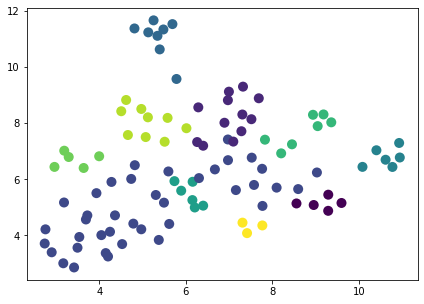

In [31]:
#可视化
import umap
X_topics = lsa.fit_transform(X)
embedding = umap.UMAP(n_neighbors=10, min_dist=0.5, random_state=12).fit_transform(X_topics)
plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = y_pred,
s = 100, # size
edgecolor='none'
            )
plt.show()